<a href="https://colab.research.google.com/github/ikarus-999/AI-NLP-Study/blob/master/STFT_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
print(tf.__version__)

1.15.0


In [2]:
print(tf.executing_eagerly())

True


## check GPU 

In [35]:
from datetime import datetime

startTime = datetime.now()

shape = (int(100000), int(100000))
with tf.device("/gpu"):
    random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)

result = sum_operation
print(result)

print("\n" * 2)
print("Time taken:", datetime.now() - startTime)
print("\n" * 2)

ResourceExhaustedError: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install -q librosa

In [10]:
!apt update -qq
!apt install -y -qq ffmpeg

89 packages can be upgraded. Run 'apt list --upgradable' to see them.
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.


In [11]:
!ffmpeg -version

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-

In [0]:
!wget -q https://github.com/Tony607/blog_statics/releases/download/v1.0/siren_mfcc_demo.wav

# Decode wav file

In [13]:
## Check the sampling rate of the WAV file.
audio_file = './siren_mfcc_demo.wav'

import wave
with wave.open(audio_file, "rb") as wave_file:
    sr = wave_file.getframerate()
print(sr)

44100


In [14]:
audio_binary = tf.read_file(audio_file)
waveform = tf.contrib.ffmpeg.decode_audio(audio_binary, file_format='wav', samples_per_second=sr, channel_count=1)
print(waveform.numpy().shape)

Instructions for updating:
tf.contrib.ffmpeg will be removed in 2.0, the support for video and audio will continue to be provided in tensorflow-io: https://github.com/tensorflow/io
(59904, 1)


In [15]:
signals = tf.reshape(waveform, [1, -1])
signals.get_shape()

TensorShape([Dimension(1), Dimension(59904)])

# STFT test

(1, 116, 513)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


(3.6409717+0j)

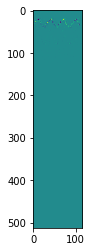

In [27]:
# STFT
waves = tf.signal.stft(signals, frame_length=1024, frame_step=512, fft_length=1024)
print(waves.numpy().shape)

array = waves.numpy().astype(np.float)[0]
plt.imshow(np.transpose(array))

In [33]:
x = waves.numpy()

[[ 3.6409717e+00+0.0000000e+00j -1.0116198e+00-2.1894150e+00j
  -1.0176513e-01+6.4674634e-01j ... -1.1810400e-03-6.1843991e-03j
   8.8036060e-04+4.1137934e-03j -5.1701069e-04+0.0000000e+00j]
 [ 1.0861310e+01+0.0000000e+00j -6.5244179e+00+3.9339883e+00j
   5.1325917e-01-1.1704464e+00j ... -9.9956989e-05-1.2123585e-03j
  -1.5347004e-03-1.0513067e-03j  2.4080276e-03+0.0000000e+00j]
 [ 7.1081324e+00+0.0000000e+00j -2.0113444e+00-2.9318407e+00j
  -1.6812906e+00+5.2392173e-01j ...  1.8076897e-03+6.0835481e-04j
  -3.3167601e-03+2.7229786e-03j  2.8276443e-03+0.0000000e+00j]
 ...
 [ 3.1577601e+00+0.0000000e+00j -2.8875513e+00-2.5486038e+00j
   1.6512046e+00+1.0414726e+00j ...  1.9203424e-03-1.3676882e-03j
  -1.2207031e-03-2.8259754e-03j  1.1553764e-03+0.0000000e+00j]
 [ 1.9715124e+00+0.0000000e+00j  4.2770785e-01+4.8566513e+00j
  -1.2734351e+00-1.7537888e+00j ... -1.7963052e-03-3.1455159e-03j
  -7.3555112e-04+4.0354729e-03j  1.8466711e-03+0.0000000e+00j]
 [ 1.0713552e+01+0.0000000e+00j -6.23244